# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

* https://github.com/ijmbarr/causalgraphicalmodels
* https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
* https://en.wikipedia.org/wiki/Vehicular_metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

font_size=15
title_font_size=25

In [4]:
import pandas as pd
print(pd.__version__)

1.4.3


In [5]:
from scipy.stats import skewnorm

In [6]:
import seaborn as sns

In [7]:
# !pip install causalgraphicalmodels

In [8]:
# https://github.com/ijmbarr/causalgraphicalmodels
# https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
from causalgraphicalmodels import StructuralCausalModel

In [9]:
# https://en.wikipedia.org/wiki/Vehicular_metrics

braking_distance_mean = 40
braking_distance_std = 5
power_mean = 100
power_std = 50

car_safety_model = StructuralCausalModel({
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1)
})

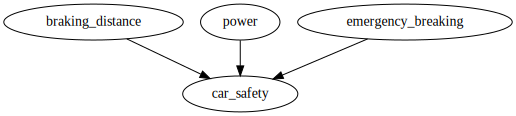

In [10]:
car_safety_model.cgm.draw()

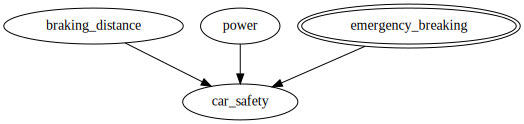

In [11]:
car_safety_model_do_emergency_breaking = car_safety_model.do("emergency_breaking")

car_safety_model_do_emergency_breaking.cgm.draw()

In [12]:
car_safety_model.cgm.get_distribution()

'P(emergency_breaking)P(braking_distance)P(power)P(car_safety|emergency_breaking,braking_distance,power)'

In [13]:
n_samples=10_000
# data = car_safety_model_do_emergency_breaking.sample(n_samples=n_samples, 
#                                                      set_values={"emergency_breaking": np.ones(n_samples)})
data = car_safety_model.sample(n_samples=n_samples)
data.head()

,emergency_breaking,braking_distance,power,car_safety
0,0,40.869119,175.682568,-1.675870
1,1,47.032239,158.331005,-1.533511
2,1,37.282514,166.300408,0.089228
3,1,42.781652,158.862636,-0.751742
4,0,37.667392,126.946347,-0.110881


In [14]:
braking_distance = 31.983544

In [15]:
(braking_distance - braking_distance_mean) / braking_distance_std

-1.6032912000000004

In [16]:
power = 50

In [17]:
abs(power - power_mean) / power_std

1.0

In [18]:
data.describe()

,emergency_breaking,braking_distance,power,car_safety
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601400,39.998378,135.753438,-0.194888
std,0.489635,5.011362,35.008760,1.274941
min,0.000000,21.117095,33.211633,-5.674560
25%,0.000000,36.663093,111.060273,-1.028168
50%,1.000000,39.965087,132.716584,-0.146954
75%,1.000000,43.373678,157.010496,0.660153
max,1.000000,59.665939,291.880536,4.221605


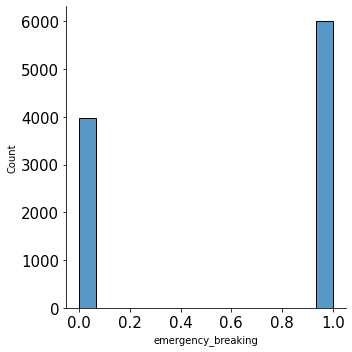

In [19]:
sns.displot(data["emergency_breaking"]);

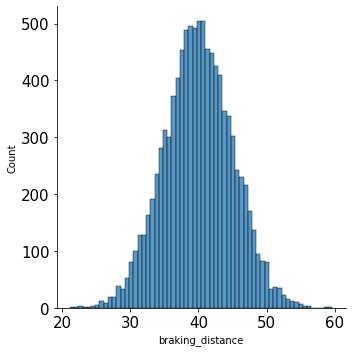

In [20]:
sns.displot(data["braking_distance"]);

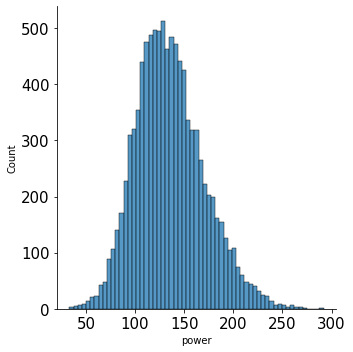

In [21]:
sns.displot(data["power"]);

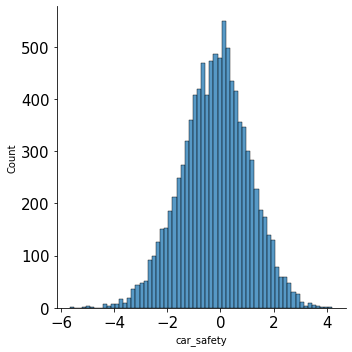

In [22]:
sns.displot(data["car_safety"]);

In [23]:
# sns.kdeplot?

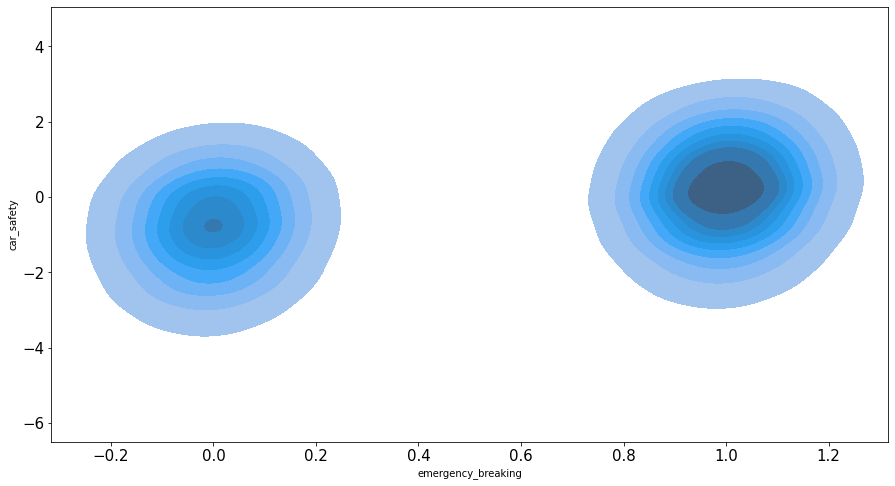

In [24]:
sns.kdeplot(
    data=data["emergency_breaking"],
    data2=data["car_safety"],
    fill=True
);

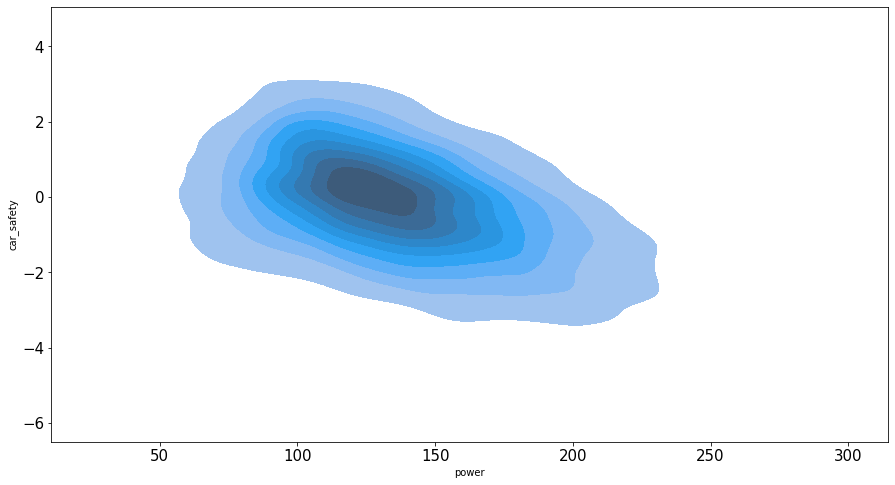

In [25]:
sns.kdeplot(
    data=data["power"],
    data2=data["car_safety"],
    fill=True
);

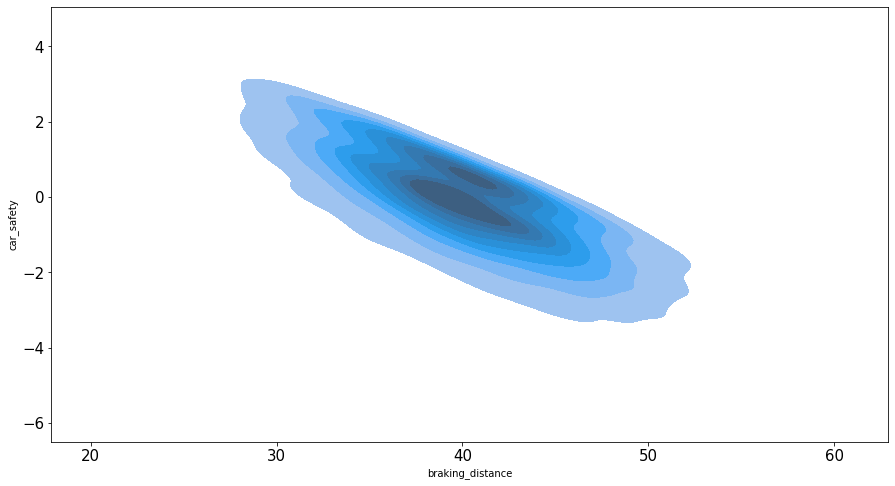

In [26]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["car_safety"],
    fill=True
);

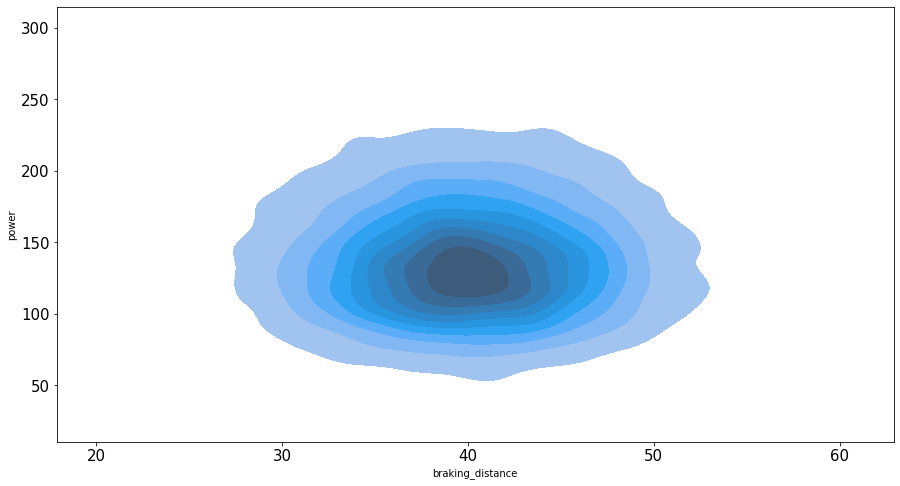

In [27]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["power"],
    fill=True
);

In [28]:
from scipy.stats import pearsonr


In [29]:
# pearsonr?

In [30]:
r, p_value = pearsonr(data['braking_distance'], data['power'])
# The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
r, p_value

(0.006375520650375956, 0.5238129857264797)

In [31]:
r, p_value = pearsonr(data['braking_distance'], data['car_safety'])
r, p_value

(-0.78816607818982, 0.0)

In [32]:
r, p_value = pearsonr(data['power'], data['car_safety'])
r, p_value

(-0.4450362352743422, 0.0)

# Driver's ability

age distribution: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-altersgruppen-deutschland.html

(16, 100, 35.0509, 13.307618464248215, 10000)

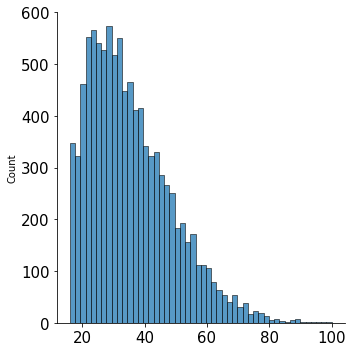

In [33]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [34]:
driver_ability_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    "age": lambda n_samples: skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1)})

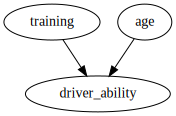

In [35]:
driver_ability_model.cgm.draw()

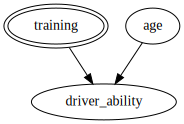

In [36]:
driver_ability_model_with_training = driver_ability_model.do("training")

driver_ability_model_with_training.cgm.draw()

In [37]:
driver_ability_model.cgm.get_distribution()

'P(training)P(age)P(driver_ability|training,age)'

In [38]:
n_samples=10_000
data = driver_ability_model.sample(n_samples=n_samples)
data.head()

,training,age,driver_ability
0,0,27.753823,-0.292286
1,1,46.114056,0.586163
2,1,33.091553,0.822175
3,0,24.679275,-0.492284
4,0,37.037999,-0.011183


In [39]:
age = 80

In [40]:
# abs(age - age_skewed_mean) / age_skewed_std
# more balanced
abs(age - age_skewed_mean) / age_std

2.043140909090909

In [41]:
data.describe()

,training,age,driver_ability
count,10000.000000,10000.000000,10000.000000
mean,0.202500,35.410286,-0.276847
std,0.401883,13.227980,0.550763
min,0.000000,14.170182,-3.434678
25%,0.000000,24.933440,-0.607492
50%,0.000000,32.839233,-0.326006
75%,0.000000,43.159029,-0.038633
max,1.000000,106.588755,1.209254


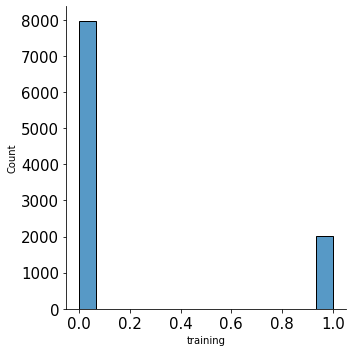

In [42]:
sns.displot(data["training"]);

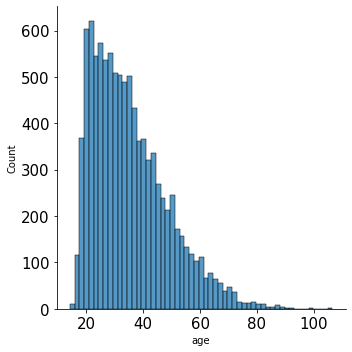

In [43]:
sns.displot(data["age"]);

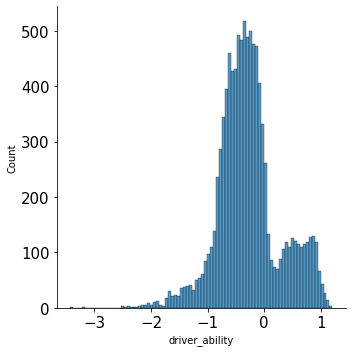

In [44]:
sns.displot(data["driver_ability"]);

In [45]:
# sns.kdeplot?

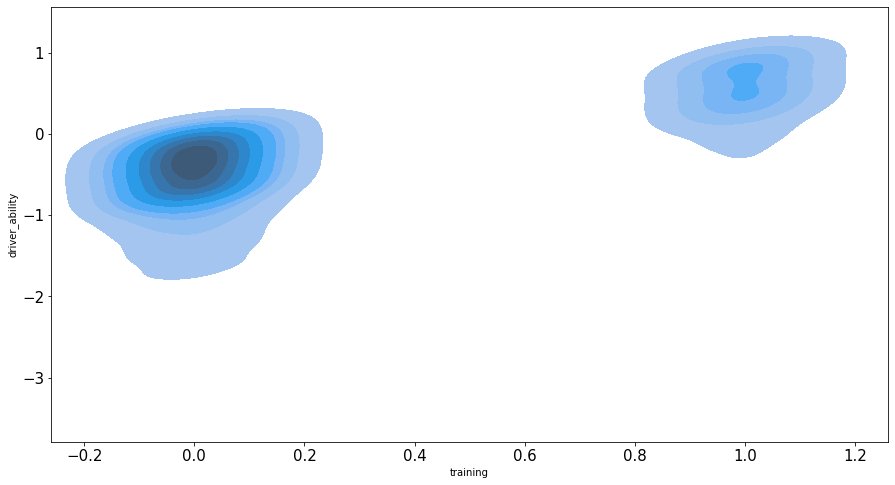

In [46]:
sns.kdeplot(
    data=data["training"],
    data2=data["driver_ability"],
    fill=True
);

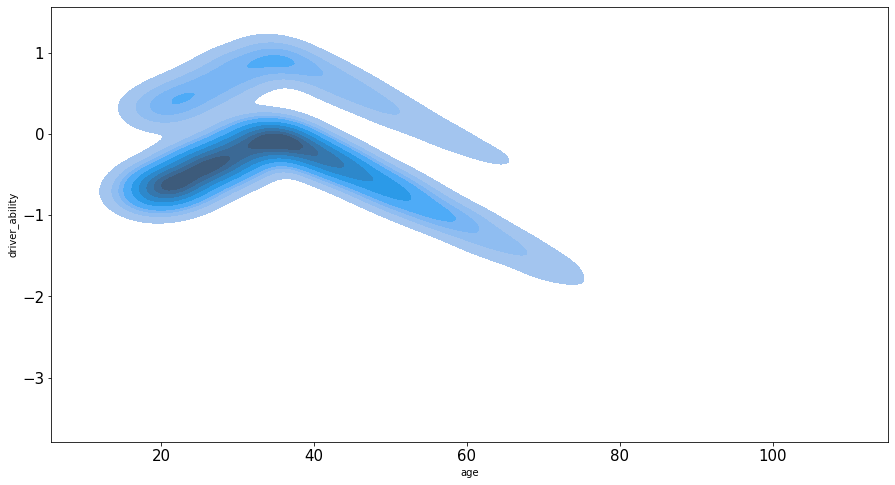

In [47]:
sns.kdeplot(
    data=data["age"],
    data2=data["driver_ability"],
    fill=True
);

In [48]:
r, p_value = pearsonr(data['age'], data['driver_ability'])
r, p_value

(-0.31742275135627196, 6.775004017645439e-233)

In [49]:
r, p_value = pearsonr(data['training'], data['driver_ability'])
r, p_value

(0.727642145048944, 0.0)

In [50]:
r, p_value = pearsonr(data['training'], data['age'])
r, p_value

(0.0062953758401680035, 0.5290445942641604)

# Combined risk model

In [51]:
from sklearn.preprocessing import normalize

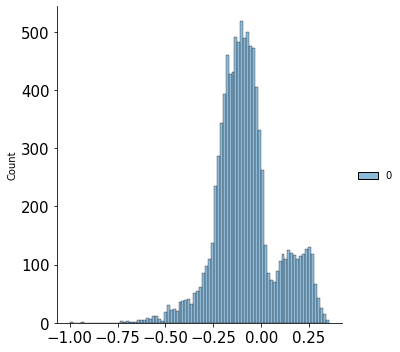

In [52]:
ability = normalize(data['driver_ability'].values.reshape(-1, 1), axis=0, norm='max')
sns.displot(ability);

(18.565293030591885, 206.6200298453989, 80.81070024269853, 25.105679725856444)

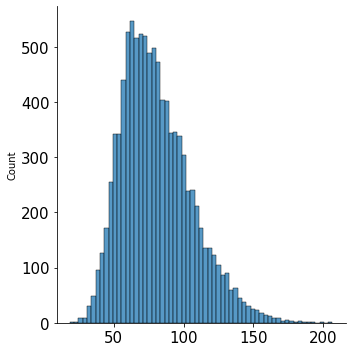

In [53]:
miles_mean = 50
miles_std = 40

x = skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples)
sns.displot(x);
miles_skewed_mean = x.mean()
miles_skewed_std = x.std()

x.min(), x.max(), miles_skewed_mean, miles_skewed_std

In [54]:
risk_model = StructuralCausalModel({
    "ability": lambda n_samples: driver_ability_model.sample(n_samples=n_samples)['driver_ability'], 
    "safety": lambda n_samples: car_safety_model.sample(n_samples=n_samples)['car_safety'],
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda ability, safety, miles, n_samples:
                # negative score is high risk
             - np.random.normal(loc=ability + \
                             safety -
                             # all deviation from good miles is negative
                             abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

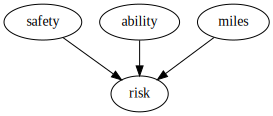

In [55]:
risk_model.cgm.draw()

In [56]:
n_samples=10_000
data = risk_model.sample(n_samples=n_samples)
data.head()

,ability,safety,miles,risk
0,-0.167435,0.105190,69.080811,0.602047
1,0.869434,2.930428,70.623907,-3.190053
2,-0.570984,0.288855,66.824057,0.678315
3,-0.350545,1.396286,84.632737,-0.237079
4,-0.153108,1.162984,93.562346,0.001664


In [57]:
data.describe()

,ability,safety,miles,risk
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.284764,-0.201936,80.938880,1.282975
std,0.550951,1.265650,25.689940,1.507054
min,-3.112898,-5.426222,22.609607,-3.757381
25%,-0.606745,-1.028353,61.832220,0.242028
50%,-0.327636,-0.165633,76.655674,1.244436
75%,-0.045907,0.678526,95.826466,2.281211
max,1.229152,4.233698,204.370487,7.603032


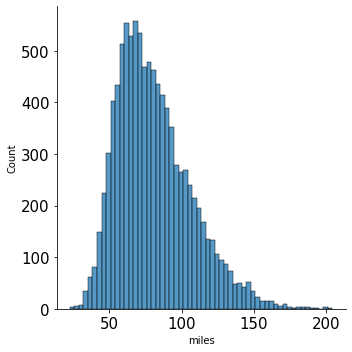

In [58]:
sns.displot(data["miles"]);

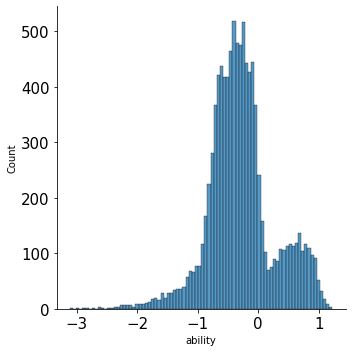

In [59]:
sns.displot(data["ability"]);

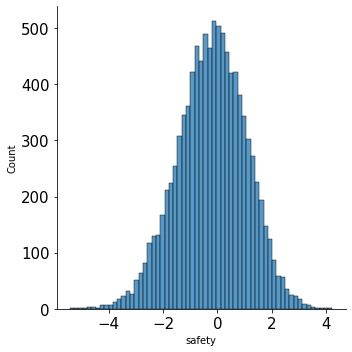

In [60]:
sns.displot(data["safety"]);

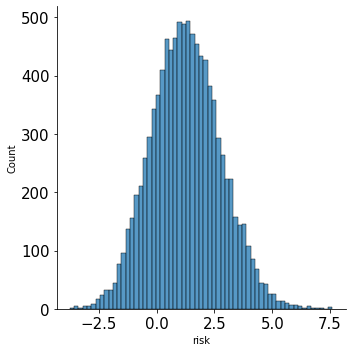

In [61]:
sns.displot(data["risk"]);

In [62]:
# sns.kdeplot?

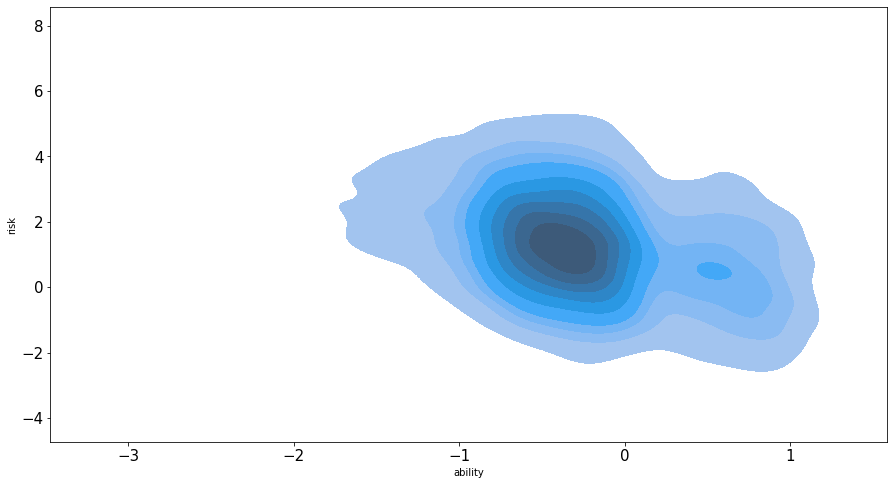

In [63]:
sns.kdeplot(
    data=data["ability"],
    data2=data["risk"],
    fill=True
);

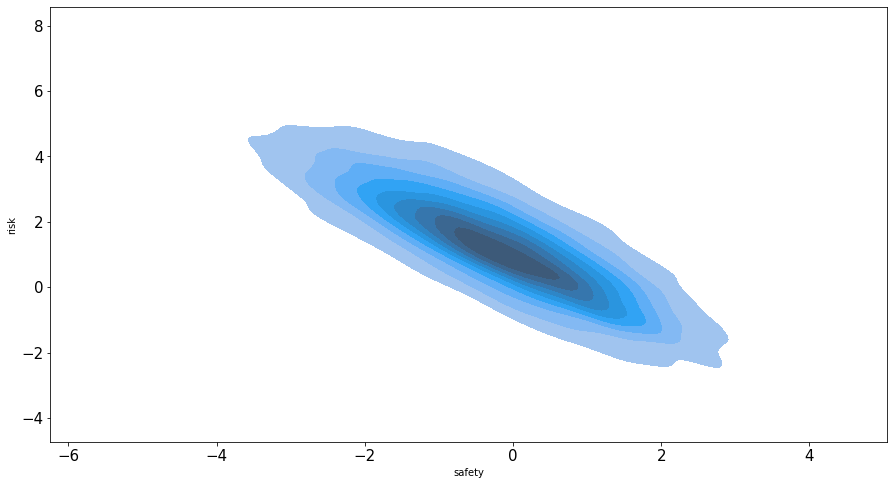

In [64]:
sns.kdeplot(
    data=data["safety"],
    data2=data["risk"],
    fill=True
);

In [65]:
r, p_value = pearsonr(data['safety'], data['risk'])
r, p_value

(-0.8339290615098743, 0.0)

In [66]:
r, p_value = pearsonr(data['ability'], data['risk'])
r, p_value

(-0.3574524858940503, 3.60788728071545e-299)

In [67]:
r, p_value = pearsonr(data['ability'], data['safety'])
r, p_value

(-0.012804995430574763, 0.20040732011598197)

# Decomposed combined

(16, 94, 34.9656, 13.322545426456612, 10000)

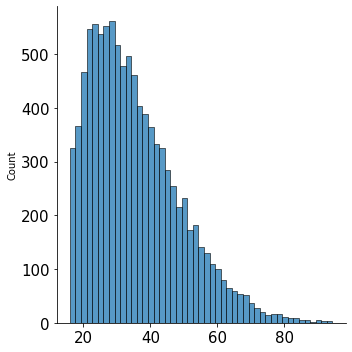

In [68]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [69]:
# can be changed over time in favor of the car
# driver is overall more important than car
driver_weight = 4

risk_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
#     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
    "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1),
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.40, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1),
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda driver_ability, car_safety, miles, n_samples:
             # negative score is high risk
             - np.random.normal(loc=\
                             driver_ability * driver_weight\
                             + car_safety
                             # all deviation from good miles is negative
                             - abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

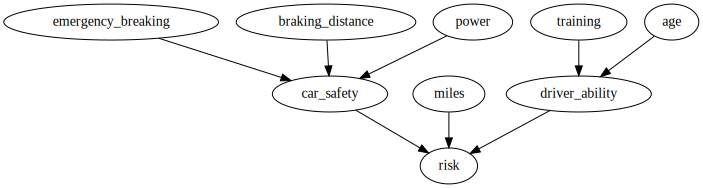

In [70]:
risk_model.cgm.draw()

In [71]:
# n_samples=10_000
n_samples=1_500
np.random.seed(42)
data = risk_model.sample(n_samples=n_samples)
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,74.493138,1,38.264068,122.527184,55.990778,-1.757242,0.803182,6.301761
1,1,67.074261,0,43.854011,115.367900,92.431499,-0.423655,-0.958545,3.778432
2,0,47.691471,0,34.730823,126.498658,93.712797,-0.662759,0.670282,3.068465
3,0,55.429717,0,42.139072,125.629252,96.785658,-1.046908,-0.821925,6.264521
4,0,41.088408,1,31.490489,241.447458,75.892419,-0.250151,-0.077803,1.792561


In [72]:
data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,80.026726,-0.264505,-0.396552,2.224277
std,0.405532,13.193059,0.486679,5.108156,36.527189,24.438771,0.545195,1.273974,2.576836
min,0.000000,16.000000,0.000000,25.502431,31.956980,24.258544,-2.371632,-4.755363,-6.214499
25%,0.000000,24.971581,0.000000,36.261921,112.369662,62.155913,-0.591314,-1.242621,0.576198
50%,0.000000,32.511926,0.000000,39.697162,134.053456,76.716717,-0.309448,-0.377730,2.334717
75%,0.000000,43.043168,1.000000,43.284010,160.117914,93.728268,-0.021742,0.495051,3.807713
max,1.000000,88.456666,1.000000,55.491497,281.197004,180.794608,1.164277,3.637374,13.350580


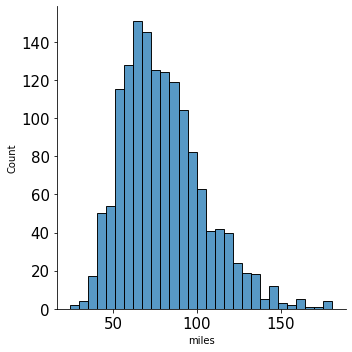

In [73]:
sns.displot(data["miles"]);

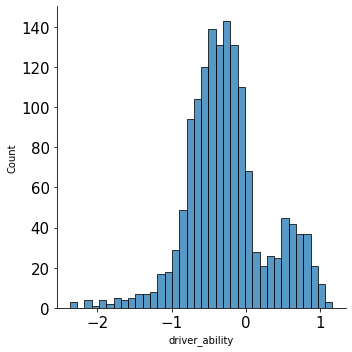

In [74]:
sns.displot(data["driver_ability"]);

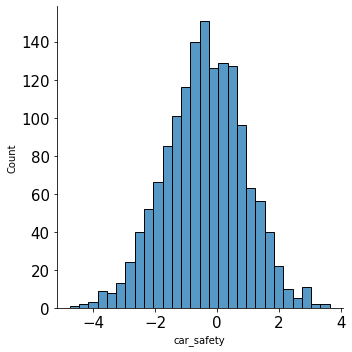

In [75]:
sns.displot(data["car_safety"]);

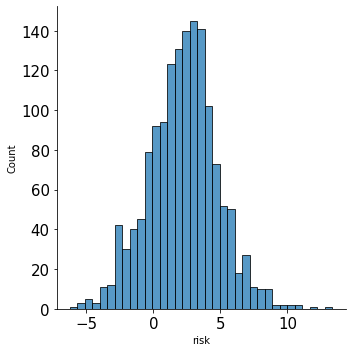

In [76]:
sns.displot(data["risk"]);

In [77]:
# sns.kdeplot?

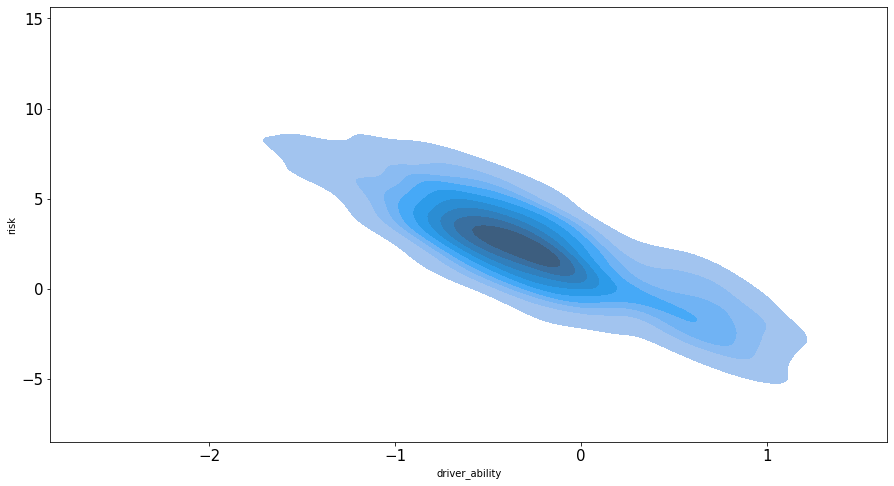

In [78]:
sns.kdeplot(
    data=data["driver_ability"],
    data2=data["risk"],
    fill=True
);

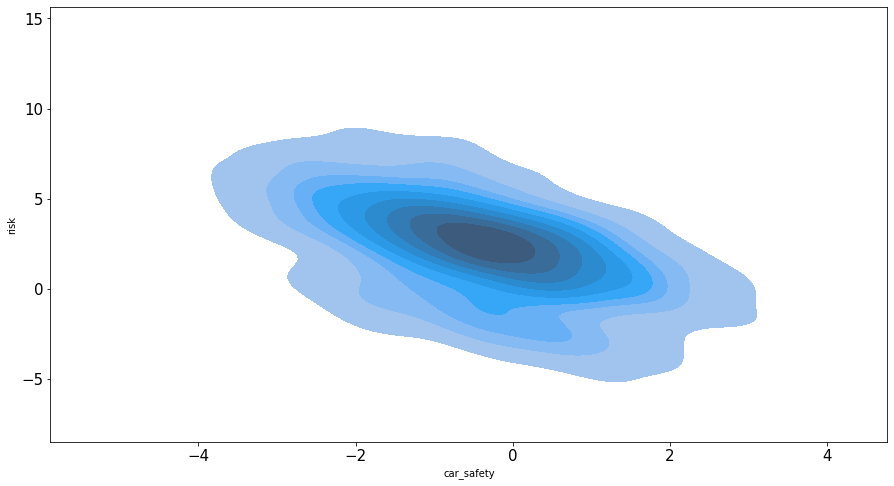

In [79]:
sns.kdeplot(
    data=data["car_safety"],
    data2=data["risk"],
    fill=True
);

In [80]:
r, p_value = pearsonr(data['car_safety'], data['risk'])
r, p_value

(-0.49479406271340276, 1.8971704105890404e-93)

In [81]:
r, p_value = pearsonr(data['driver_ability'], data['risk'])
r, p_value

(-0.836384924563646, 0.0)

In [82]:
r, p_value = pearsonr(data['driver_ability'], data['car_safety'])
r, p_value

(-0.0029994709561650726, 0.9075951411085107)

# Preparation of Dataset

In [83]:
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,74.493138,1,38.264068,122.527184,55.990778,-1.757242,0.803182,6.301761
1,1,67.074261,0,43.854011,115.367900,92.431499,-0.423655,-0.958545,3.778432
2,0,47.691471,0,34.730823,126.498658,93.712797,-0.662759,0.670282,3.068465
3,0,55.429717,0,42.139072,125.629252,96.785658,-1.046908,-0.821925,6.264521
4,0,41.088408,1,31.490489,241.447458,75.892419,-0.250151,-0.077803,1.792561


In [84]:
GREEN = 2
YELLOW = 1
RED = 0

In [85]:
features = ['training', 'age', 'emergency_breaking', 'braking_distance', 'power', 'miles', 'risk']

In [86]:
# preprocessed_data = data[['driver_ability', 'car_safety', 'miles', 'risk']]
preprocessed_data = data[features]
# preprocessed_data = data.copy()
preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
preprocessed_data['group_name'] = 'medium'
preprocessed_data['group'] = YELLOW
preprocessed_data.head()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,74.493138,1,38.264068,122.527184,55.990778,0.472022,medium,1
1,1,67.074261,0,43.854011,115.367900,92.431499,0.283016,medium,1
2,0,47.691471,0,34.730823,126.498658,93.712797,0.229838,medium,1
3,0,55.429717,0,42.139072,125.629252,96.785658,0.469232,medium,1
4,0,41.088408,1,31.490489,241.447458,75.892419,0.134268,medium,1


In [87]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0
mean,0.207333,35.243806,0.384667,39.728535,137.524885,80.026726,0.166605,1.0
std,0.405532,13.193059,0.486679,5.108156,36.527189,24.438771,0.193013,0.0
min,0.000000,16.000000,0.000000,25.502431,31.956980,24.258544,-0.465485,1.0
25%,0.000000,24.971581,0.000000,36.261921,112.369662,62.155913,0.043159,1.0
50%,0.000000,32.511926,0.000000,39.697162,134.053456,76.716717,0.174878,1.0
75%,0.000000,43.043168,1.000000,43.284010,160.117914,93.728268,0.285210,1.0
max,1.000000,88.456666,1.000000,55.491497,281.197004,180.794608,1.000000,1.0


In [88]:
# balanced? imbalanced?
low_risk_threshold = preprocessed_data['risk'].quantile(.45)
# low_risk_threshold = preprocessed_data['risk'].quantile(.4)
# low_risk_threshold = preprocessed_data['risk'].quantile(.35)
# low_risk_threshold = preprocessed_data['risk'].quantile(.3333)
# low_risk_threshold = preprocessed_data['risk'].quantile(.50)
low_risk_threshold

0.14994835528871714

In [89]:
# high_risk_threshold = preprocessed_data['risk'].quantile(.6)
# high_risk_threshold = preprocessed_data['risk'].quantile(.65)
# high_risk_threshold = preprocessed_data['risk'].quantile(.6666)
high_risk_threshold = preprocessed_data['risk'].quantile(.55)
# high_risk_threshold = preprocessed_data['risk'].quantile(.75)
high_risk_threshold

0.19757625968742146

In [90]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])

In [91]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

In [92]:
np.unique(preprocessed_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([675, 675, 150]))

In [93]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])

In [94]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])

In [95]:
preprocessed_data.head(10)

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,74.493138,1,38.264068,122.527184,55.990778,0.472022,high,0
1,1,67.074261,0,43.854011,115.367900,92.431499,0.283016,high,0
2,0,47.691471,0,34.730823,126.498658,93.712797,0.229838,high,0
3,0,55.429717,0,42.139072,125.629252,96.785658,0.469232,high,0
4,0,41.088408,1,31.490489,241.447458,75.892419,0.134268,low,2
5,0,69.693872,0,37.193310,167.797457,98.267345,0.592587,high,0
6,0,49.558664,0,38.352553,164.678203,65.638725,0.237081,high,0
7,1,28.690422,0,48.374298,126.981076,63.689887,-0.028351,low,2
8,0,31.817048,0,38.625988,95.699767,57.765999,-0.001287,low,2
9,0,37.597146,1,28.993783,128.365608,72.779806,-0.081811,low,2


In [96]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,80.026726,0.166605,1.000
std,0.405532,13.193059,0.486679,5.108156,36.527189,24.438771,0.193013,0.949
min,0.000000,16.000000,0.000000,25.502431,31.956980,24.258544,-0.465485,0.000
25%,0.000000,24.971581,0.000000,36.261921,112.369662,62.155913,0.043159,0.000
50%,0.000000,32.511926,0.000000,39.697162,134.053456,76.716717,0.174878,1.000
75%,0.000000,43.043168,1.000000,43.284010,160.117914,93.728268,0.285210,2.000
max,1.000000,88.456666,1.000000,55.491497,281.197004,180.794608,1.000000,2.000


In [97]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

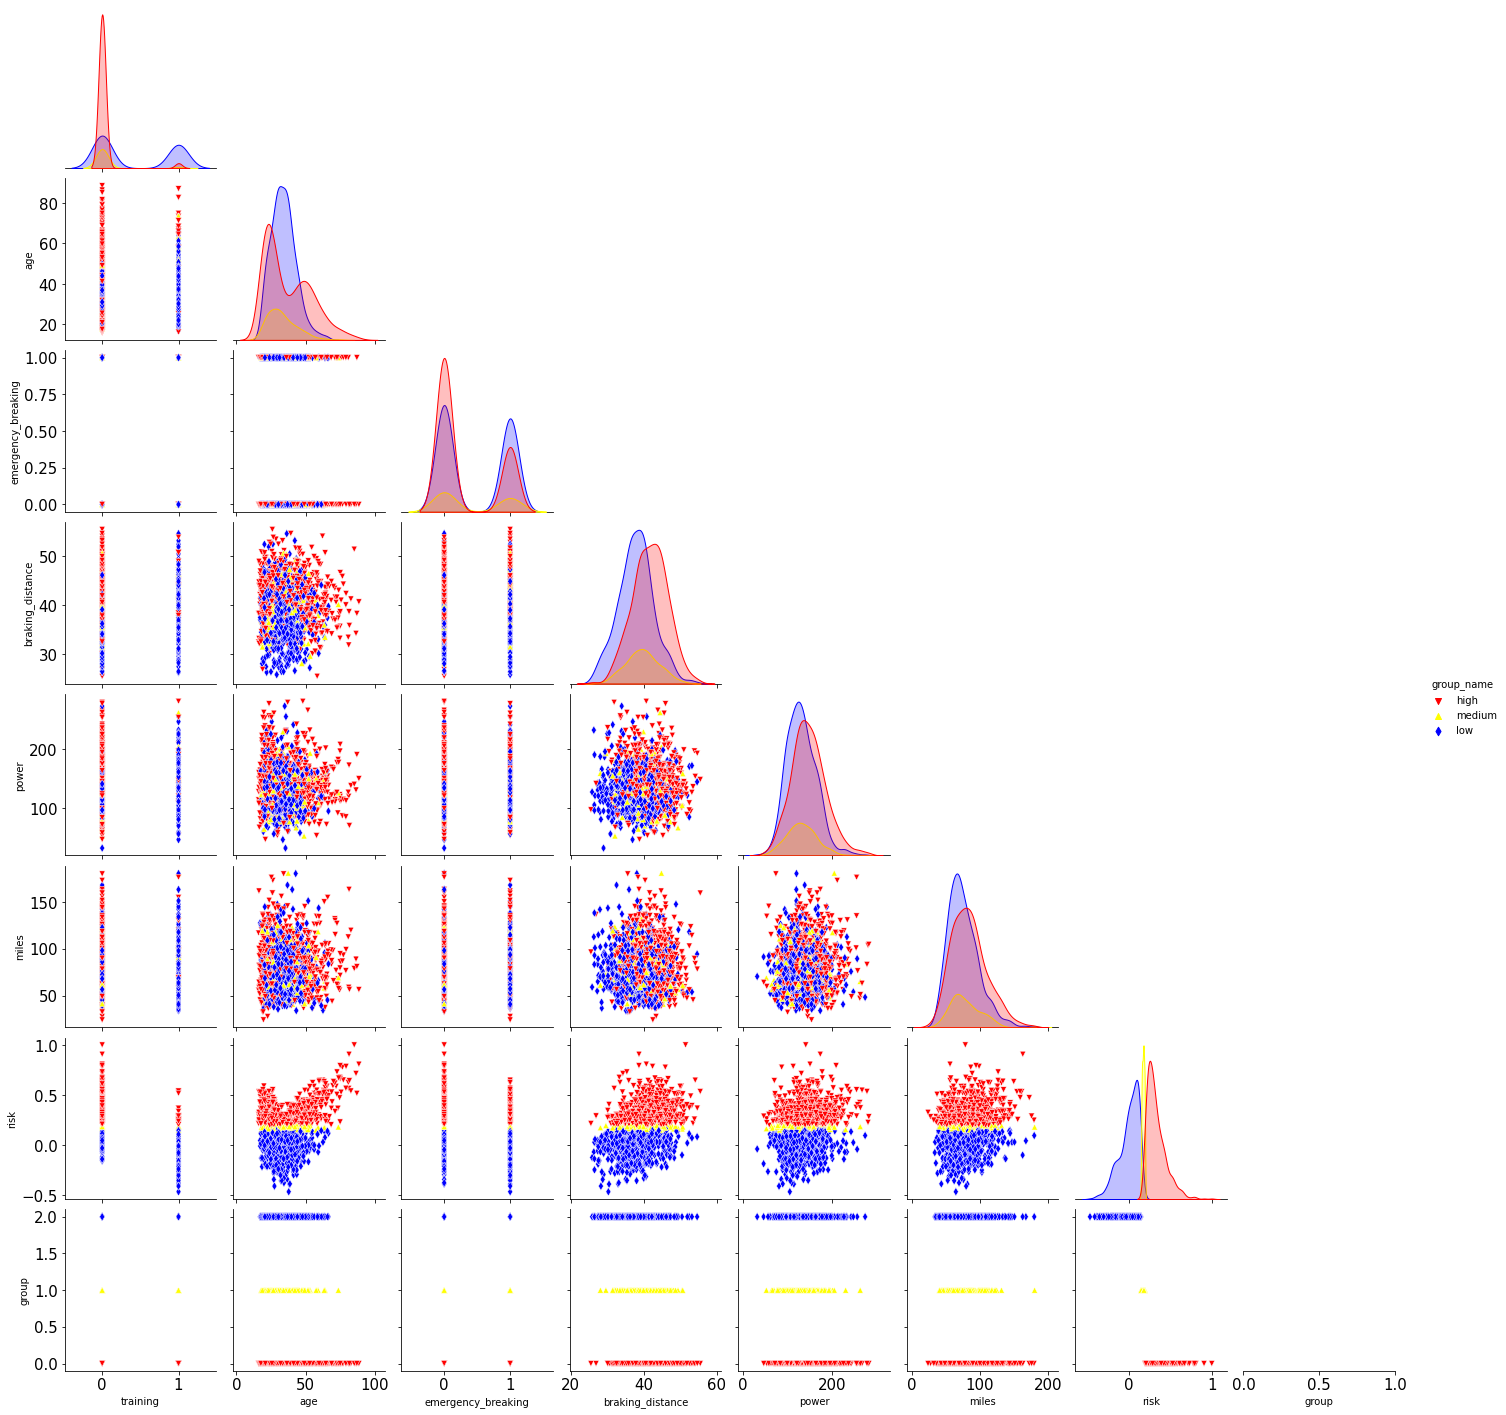

In [98]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# sns.pairplot(preprocessed_data, hue='group',  kind="kde";
 
sns.pairplot(preprocessed_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers);


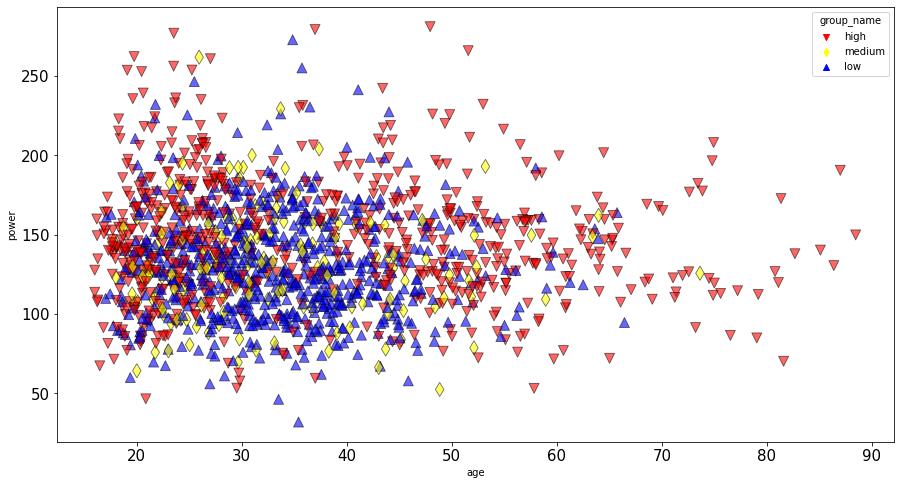

In [99]:
sns.scatterplot(preprocessed_data['age'], 
                preprocessed_data['power'], 
                hue=preprocessed_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=preprocessed_data['group_name'],
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [100]:
file_name = './model-based-1.csv'
preprocessed_data.to_csv(file_name, index=False, sep=';')

In [101]:
!ls

generate-causal.ipynb  month-15.csv  month-22.csv  month-3.csv	 month-4.csv
model-based-1.csv      month-16.csv  month-23.csv  month-30.csv  month-5.csv
month-1.csv	       month-17.csv  month-24.csv  month-31.csv  month-6.csv
month-10.csv	       month-18.csv  month-25.csv  month-32.csv  month-7.csv
month-11.csv	       month-19.csv  month-26.csv  month-33.csv  month-8.csv
month-12.csv	       month-2.csv   month-27.csv  month-34.csv  month-9.csv
month-13.csv	       month-20.csv  month-28.csv  month-35.csv  production.csv
month-14.csv	       month-21.csv  month-29.csv  month-36.csv  reference.csv


In [102]:
customers = pd.read_csv(file_name, sep=';')
customers.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,80.026726,0.166605,1.000
std,0.405532,13.193059,0.486679,5.108156,36.527189,24.438771,0.193013,0.949
min,0.000000,16.000000,0.000000,25.502431,31.956980,24.258544,-0.465485,0.000
25%,0.000000,24.971581,0.000000,36.261921,112.369662,62.155913,0.043159,0.000
50%,0.000000,32.511926,0.000000,39.697162,134.053456,76.716717,0.174878,1.000
75%,0.000000,43.043168,1.000000,43.284010,160.117914,93.728268,0.285210,2.000
max,1.000000,88.456666,1.000000,55.491497,281.197004,180.794608,1.000000,2.000


# Story: Assistant systems get more and more important, bringing down weight on driver ability and bringing up breaking systems over time 
* influence on driver ability can not be measured in input
* but inputs like age and assistant system

In [103]:
def generate_risk_data(driver_weight = 4.0, 
                       emergency_breaking_fraction = 0.40,
                       age_drift = 0,
                       miles_drift = 0,
                       n_samples=1_500, 
                       seed=42,
#                        apply_norm=True,
                       apply_norm=False,
                       low_risk_threshold = 1.0,
                       high_risk_threshold = 3.0,
                      low_risk_quantile=.3333,
                      high_risk_quantile=.6666):
    risk_model = StructuralCausalModel({
        "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    #     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
        "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100) \
            + np.random.normal(age_drift, scale=0.1, size=n_samples),
        "driver_ability": \
            lambda training, age, n_samples: 
                np.random.normal(loc=training - \
                                 # all deviation from good age is negative
                                 # using unskwed mean makes this a bit more balanaced
                                 abs(age - age_skewed_mean) / age_std, \
                                 scale=0.1),
        "emergency_breaking": lambda n_samples: np.random.binomial(1, p=emergency_breaking_fraction, size=n_samples), 
        "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
        "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
        "car_safety": \
            lambda emergency_breaking, braking_distance, power, n_samples: \
                np.random.normal(loc=emergency_breaking - \
                                 # having a breaking distance below average is negative, so we have to subtract
                                 (braking_distance - braking_distance_mean) / braking_distance_std - \
                                 # all deviation from good amount of power is negative
                                 abs(power - power_mean) / power_std, \
                                 scale=0.1),
        "miles": lambda n_samples: np.clip(skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples) \
            + np.random.normal(miles_drift, scale=1, size=n_samples), a_min=5, a_max=None),
        "risk": \
            lambda driver_ability, car_safety, miles, n_samples:
                    # negative score is high risk
                    # driver is overall more important than car
                 - np.random.normal(loc=\
                                 driver_ability * driver_weight\
                                 + car_safety
                                 # all deviation from good miles is negative
                                 - abs(miles - miles_mean) / miles_std, \
                                 scale=0.1)})
    np.random.seed(seed)
    data = risk_model.sample(n_samples=n_samples)
    
    preprocessed_data = data[features]
    # preprocessed_data = data.copy()
    if apply_norm:
        preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
    preprocessed_data['group_name'] = 'medium'
    preprocessed_data['group'] = YELLOW
    
    if low_risk_threshold is None:
        low_risk_threshold = preprocessed_data['risk'].quantile(low_risk_quantile)
        high_risk_threshold = preprocessed_data['risk'].quantile(high_risk_quantile)

    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])
    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])
    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])
    
    return preprocessed_data


In [104]:
generated_data = generate_risk_data()
generated_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.240226,0.370000,40.047327,134.393736,80.415974,2.246125,0.909333
std,0.405532,13.191571,0.482965,5.292310,33.410677,25.536882,2.625291,0.824762
min,0.000000,16.019190,0.000000,20.816722,45.272791,27.414000,-6.904771,0.000000
25%,0.000000,24.948022,0.000000,36.440032,110.333073,61.828411,0.600107,0.000000
50%,0.000000,32.462481,0.000000,39.922413,132.423028,76.275210,2.342726,1.000000
75%,0.000000,43.078459,1.000000,43.675832,155.296864,95.114365,3.921785,2.000000
max,1.000000,88.425701,1.000000,57.645276,257.983238,183.970662,12.301360,2.000000


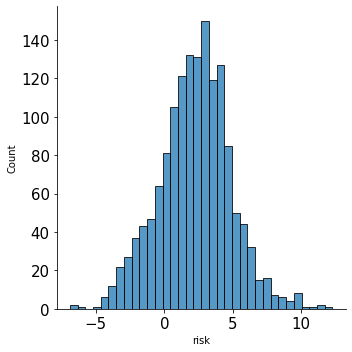

In [105]:
sns.displot(generated_data["risk"]);

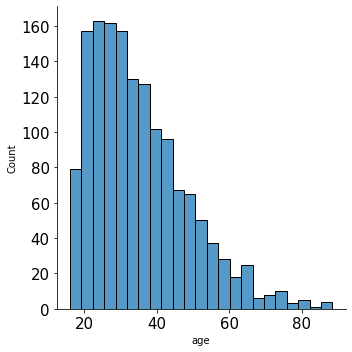

In [106]:
sns.displot(generated_data["age"]);

In [107]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([584, 448, 468]))

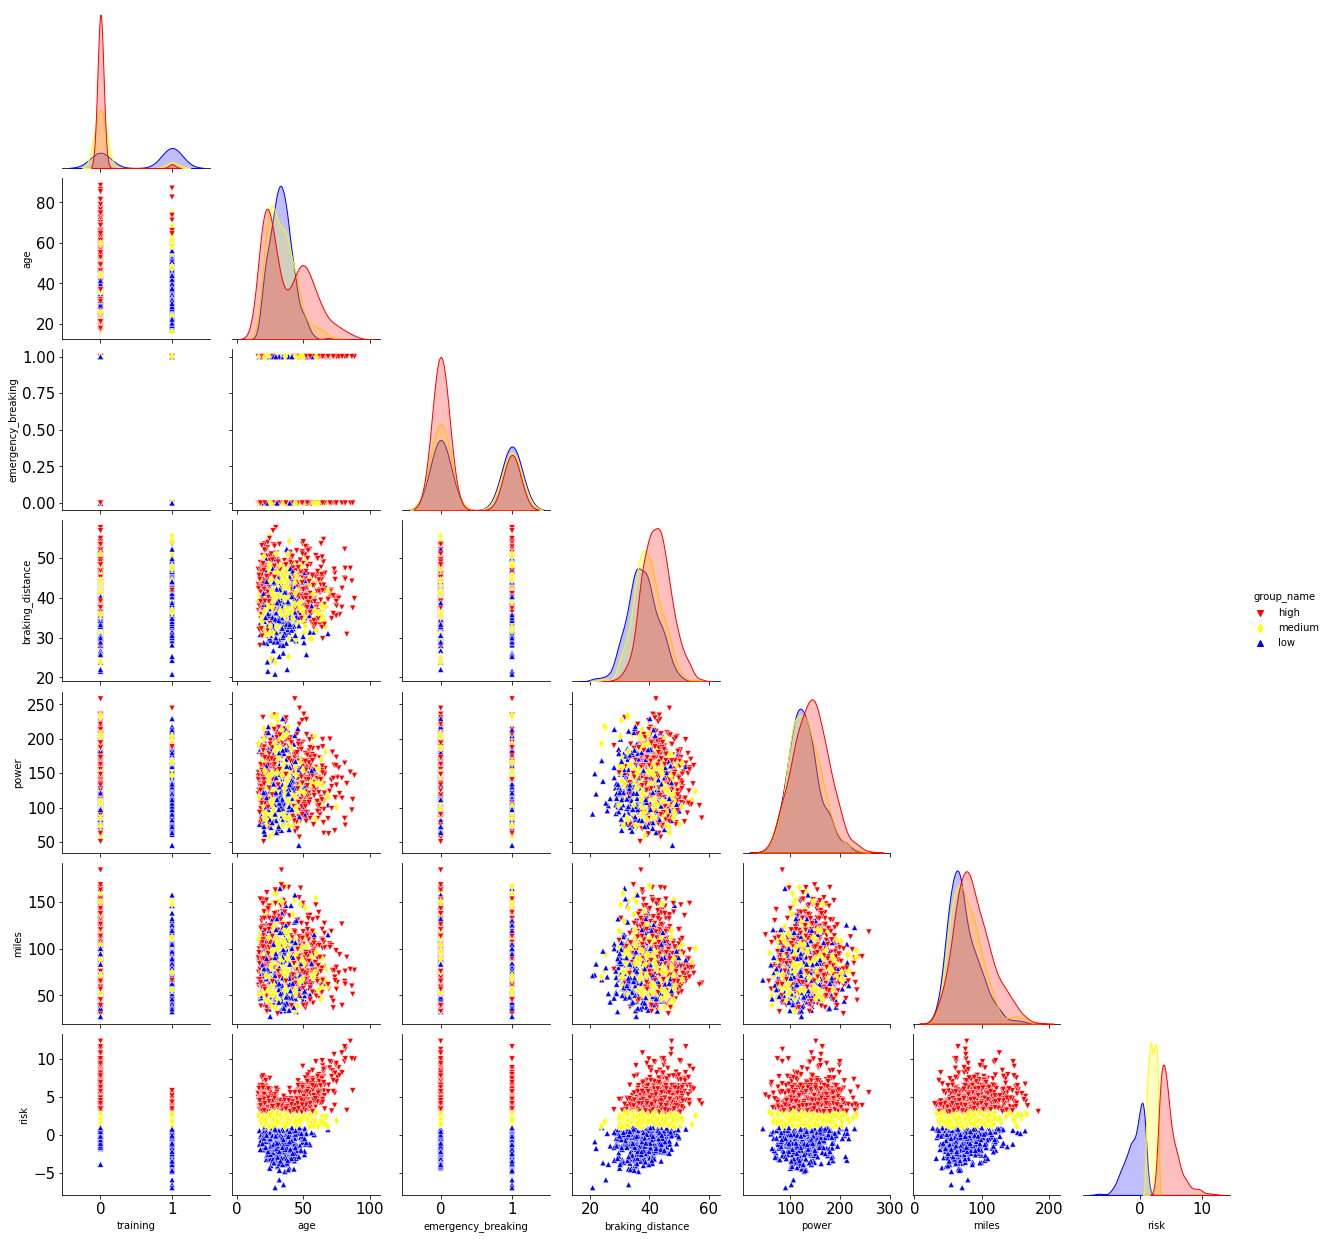

In [108]:
sns.pairplot(generated_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers,
             vars=features);

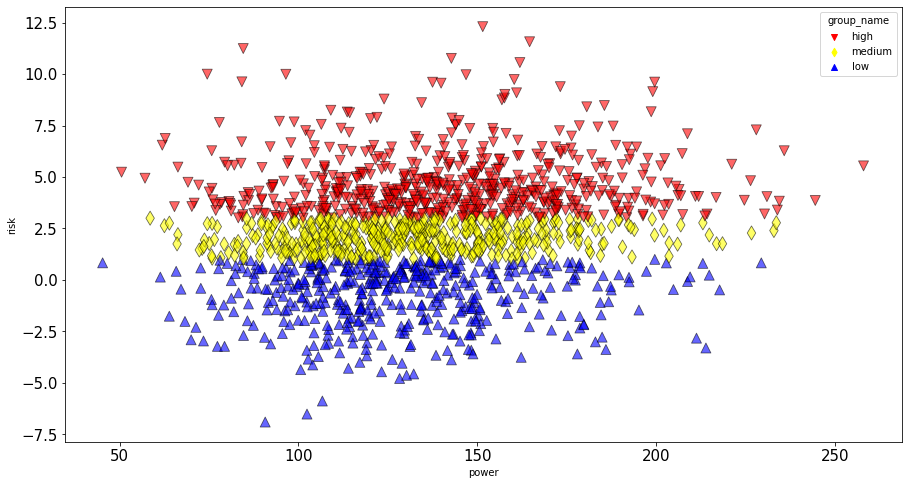

In [109]:
sns.scatterplot(generated_data['power'], 
                generated_data['risk'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

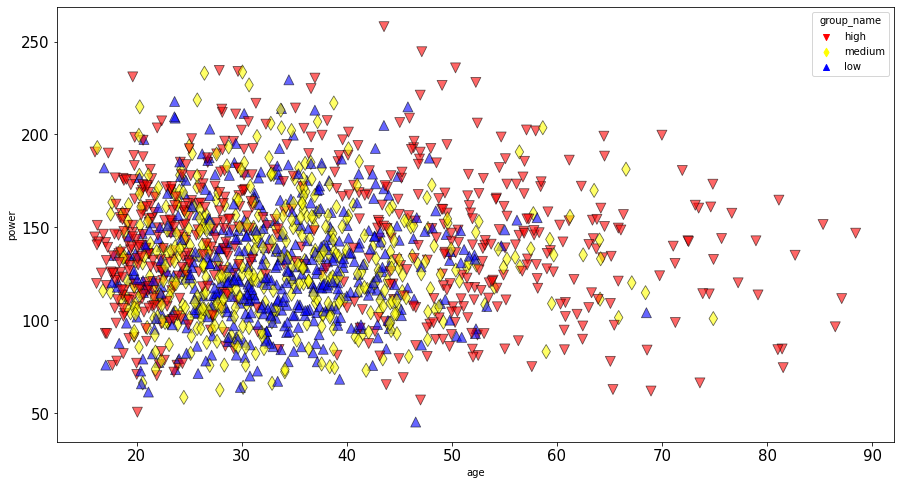

In [110]:
sns.scatterplot(generated_data['age'], 
                generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [111]:
gen_1 = generated_data

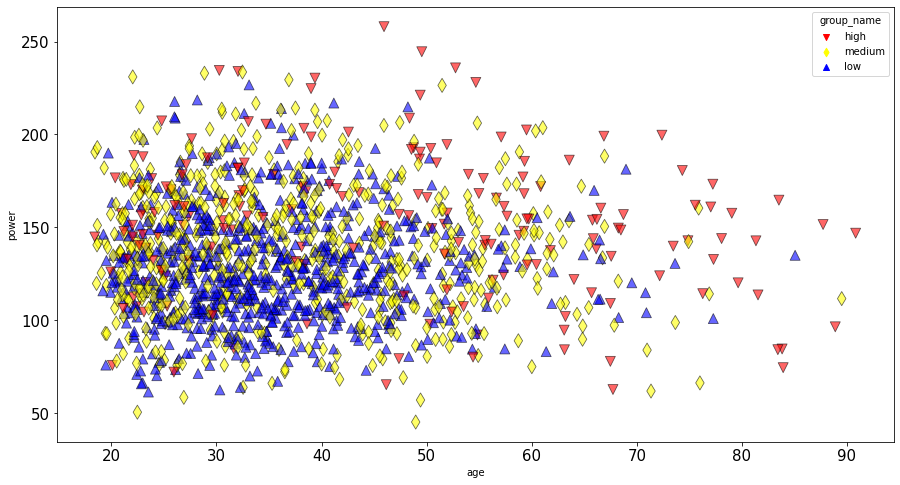

In [112]:
iteration = 24

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    emergency_breaking_fraction = 0.40 + iteration * 0.02)
sns.scatterplot(generated_data['age'], 
                generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [113]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([182, 727, 591]))

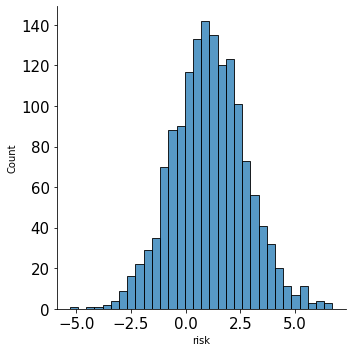

In [114]:
sns.displot(generated_data["risk"]);

In [115]:
generated_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,37.640226,0.890667,40.047327,134.393736,80.415974,1.082772,1.363333
std,0.405532,13.191571,0.312161,5.292310,33.410677,25.536882,1.678237,0.688698
min,0.000000,18.419190,0.000000,20.816722,45.272791,27.414000,-5.292712,0.000000
25%,0.000000,27.348022,1.000000,36.440032,110.333073,61.828411,-0.019377,1.000000
50%,0.000000,34.862481,1.000000,39.922413,132.423028,76.275210,1.061600,1.000000
75%,0.000000,45.478459,1.000000,43.675832,155.296864,95.114365,2.143247,2.000000
max,1.000000,90.825701,1.000000,57.645276,257.983238,183.970662,6.706427,2.000000


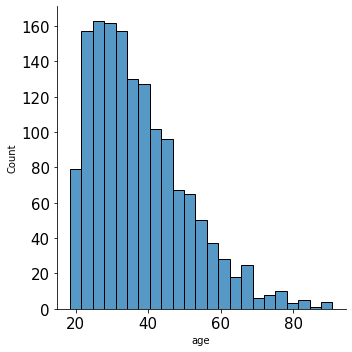

In [116]:
sns.displot(generated_data["age"]);

In [117]:
generated_data["age"].describe()

count    1500.000000
mean       37.640226
std        13.191571
min        18.419190
25%        27.348022
50%        34.862481
75%        45.478459
max        90.825701
Name: age, dtype: float64

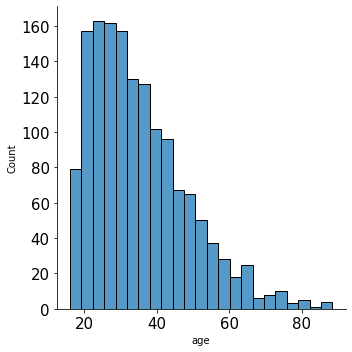

In [118]:
sns.displot(gen_1["age"]);

In [119]:
gen_1["age"].describe()

count    1500.000000
mean       35.240226
std        13.191571
min        16.019190
25%        24.948022
50%        32.462481
75%        43.078459
max        88.425701
Name: age, dtype: float64

# Generating generations of data

In [120]:
def generate_aged_data(iteration):
    assert iteration <= 36
    generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                        age_drift = iteration * 0.1,
                                        miles_drift = - iteration * 0.5,
                                        seed=iteration,
                                        emergency_breaking_fraction = 0.40 + iteration * 0.015)
    return generated_data

In [121]:
!rm *.csv

In [122]:
# first full data set, used for training
reference = generate_aged_data(0)
# all generated data in order of appearance over time, except for the reference
production = None

for iteration in range(1, 37):
    generated_data = generate_aged_data(iteration)
    if production is None:
        production = generated_data.copy()
    else:
        production = production.append(generated_data, ignore_index=True)
    file_name = f'./month-{iteration}.csv'
    generated_data.to_csv(file_name, index=False, sep=';')
    
    
file_name = './reference.csv'
reference.to_csv(file_name, index=False, sep=';')    

# production data does not have gt
production.drop(['risk', 'group_name', 'group'], axis=1, inplace=True)
file_name = f'./production.csv'
production.to_csv(file_name, index=False, sep=';')    

In [123]:
reference.head()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,41.951100,0,40.933328,122.238329,98.509765,3.715019,high,0
1,0,24.368286,1,44.797317,113.765298,46.324178,2.432928,medium,1
2,0,18.314649,1,41.587241,143.427269,76.862968,4.064888,high,0
3,0,51.265254,1,47.266716,111.578133,102.697069,5.102777,high,0
4,0,23.578861,0,42.835319,145.994235,63.690055,3.724353,high,0


In [124]:
production.head()

,training,age,emergency_breaking,braking_distance,power,miles
0,0,26.667538,0,47.343239,166.586741,72.593998
1,0,39.349117,0,46.453786,94.661980,90.019618
2,0,35.244395,0,38.405161,127.722213,100.506092
3,0,59.458304,0,36.875965,76.445918,79.063603
4,0,17.872899,1,42.515179,119.443795,69.482105


In [125]:
reference.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.210000,35.146663,0.394000,39.903294,134.888089,80.965668,2.181697,0.900000
std,0.407444,12.765348,0.488798,4.781834,35.048570,25.496752,2.482389,0.815543
min,0.000000,15.949545,0.000000,24.368993,38.246253,18.796953,-5.274407,0.000000
25%,0.000000,25.141921,0.000000,36.733165,110.008660,62.666195,0.708686,0.000000
50%,0.000000,32.714683,0.000000,39.867888,131.055019,77.094819,2.392071,1.000000
75%,0.000000,42.633629,1.000000,42.938777,157.319959,95.568682,3.867287,2.000000
max,1.000000,86.213394,1.000000,56.463472,285.750164,211.807417,10.358000,2.000000


In [126]:
production.describe()

,training,age,emergency_breaking,braking_distance,power,miles
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000
mean,0.201407,37.400236,0.673426,40.014389,135.594529,71.689365
std,0.401055,13.315348,0.468964,5.013877,35.112533,25.914521
min,0.000000,15.942465,0.000000,16.467869,22.598040,5.000000
25%,0.000000,26.929440,0.000000,36.655459,110.983195,52.751769
50%,0.000000,34.753641,1.000000,40.033643,132.552359,67.981136
75%,0.000000,45.250543,1.000000,43.407478,157.197674,86.919400
max,1.000000,102.449286,1.000000,62.946714,309.558495,224.643437


In [127]:
assert len(production) == 36 * len(reference)

In [128]:
!ls 

generate-causal.ipynb  month-16.csv  month-23.csv  month-30.csv  month-5.csv
month-1.csv	       month-17.csv  month-24.csv  month-31.csv  month-6.csv
month-10.csv	       month-18.csv  month-25.csv  month-32.csv  month-7.csv
month-11.csv	       month-19.csv  month-26.csv  month-33.csv  month-8.csv
month-12.csv	       month-2.csv   month-27.csv  month-34.csv  month-9.csv
month-13.csv	       month-20.csv  month-28.csv  month-35.csv  production.csv
month-14.csv	       month-21.csv  month-29.csv  month-36.csv  reference.csv
month-15.csv	       month-22.csv  month-3.csv   month-4.csv


In [129]:
!head production.csv

training;age;emergency_breaking;braking_distance;power;miles
0;26.667537723387603;0;47.34323870794144;166.58674075149355;72.59399751976754
0;39.3491171976091;0;46.453786337487884;94.66198000522192;90.01961849976509
0;35.244394759836375;0;38.40516059615005;127.72221294141183;100.50609242394675
0;59.458304277674436;0;36.87596512739911;76.44591819383741;79.06360345915685
0;17.87289855308511;1;42.515179440283305;119.44379510936386;69.48210495812629
0;34.79915334882412;1;39.38852009621937;120.22707409327819;92.27317109353025
0;49.13340269653133;0;35.886985296769296;171.35386776130258;61.22810924935726
0;23.296969476443767;0;40.76505008317545;122.96797977296238;94.05066552731641
0;31.554294563624037;0;38.43896261364953;186.8498359604839;62.71528426985459


# Investigating Drift
* https://evidentlyai.com/blog/data-drift-detection-large-datasets


In [130]:
import evidently

In [131]:
from evidently.analyzers.stattests.jensenshannon import jensenshannon_stat_test
from evidently.analyzers.stattests.kl_div import kl_div_stat_test
from evidently.analyzers.stattests.ks_stattest import ks_stat_test
from evidently.analyzers.stattests.psi import psi_stat_test
from evidently.analyzers.stattests.wasserstein_distance_norm import wasserstein_stat_test

In [132]:
# if the above fails
# !pip install --upgrade --force-reinstall evidently

## Age does drift 

In [133]:
# ks and wasserstein drift shortly after 10

In [134]:
# does not drift
# iteration = 12
# drifted
iteration = 13
generated_data = generate_aged_data(iteration)
wasserstein_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.1191385291393408, drifted=True, actual_threshold=0.1)

In [135]:
# does not drift
# iteration = 10
# drifted
iteration = 11
generated_data = generate_aged_data(iteration)
ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.0037657665795975317, drifted=True, actual_threshold=0.05)

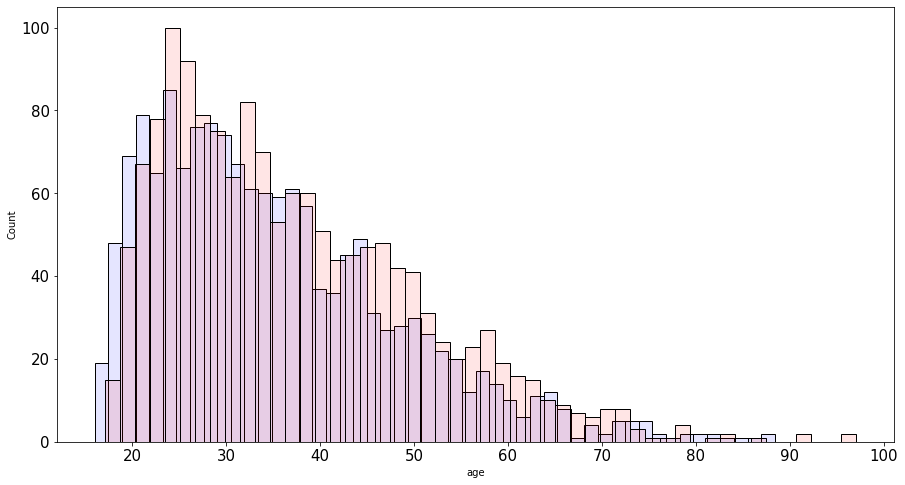

In [136]:
sns.histplot(gen_1["age"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["age"], color='red', bins=50, alpha=0.1);

## Investigating more features

In [137]:
gen_1.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.240226,0.370000,40.047327,134.393736,80.415974,2.246125,0.909333
std,0.405532,13.191571,0.482965,5.292310,33.410677,25.536882,2.625291,0.824762
min,0.000000,16.019190,0.000000,20.816722,45.272791,27.414000,-6.904771,0.000000
25%,0.000000,24.948022,0.000000,36.440032,110.333073,61.828411,0.600107,0.000000
50%,0.000000,32.462481,0.000000,39.922413,132.423028,76.275210,2.342726,1.000000
75%,0.000000,43.078459,1.000000,43.675832,155.296864,95.114365,3.921785,2.000000
max,1.000000,88.425701,1.000000,57.645276,257.983238,183.970662,12.301360,2.000000


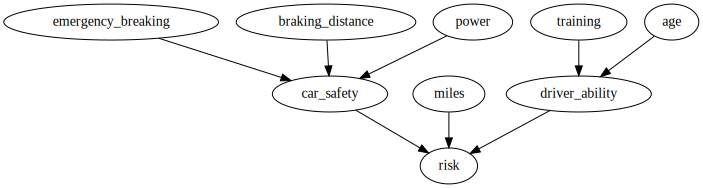

In [138]:
risk_model.cgm.draw()

## Emergy breaking feature also does drift

In [139]:
# does not drift
# iteration = 8
# drifted
iteration = 9
generated_data = generate_aged_data(iteration)
jensenshannon_stat_test(gen_1["emergency_breaking"], generated_data["emergency_breaking"], 'cat', threshold=None)

StatTestResult(drift_score=0.10317547784755317, drifted=True, actual_threshold=0.1)

## Miles drifts very quickly, people drive less

* JS and PSI seem less sensitive and need a clearer drift
* we might also increase the threshold

In [152]:
# KS and Wasserstein detect drift
iteration = 7
# JS and PSI detect drift
iteration = 8
generated_data = generate_aged_data(iteration)

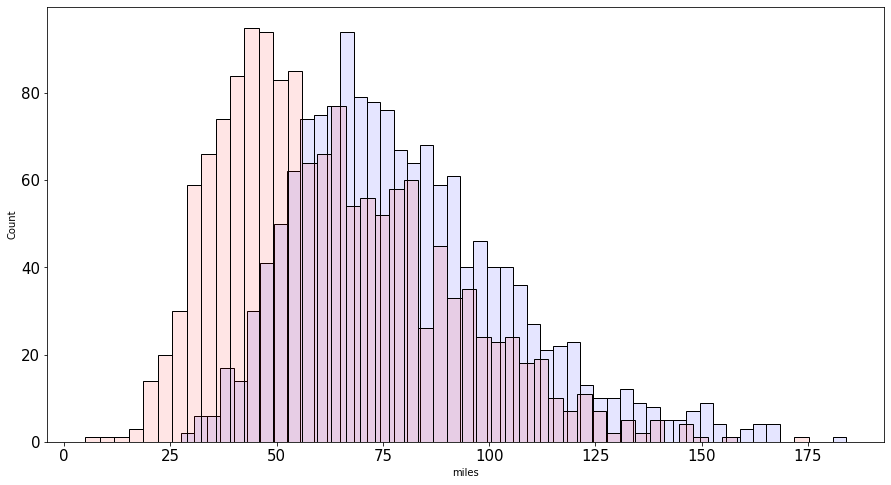

In [153]:
sns.histplot(gen_1["miles"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["miles"], color='red', bins=50, alpha=0.1);

In [142]:
wasserstein_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.14193916918357094, drifted=True, actual_threshold=0.1)

In [143]:
ks_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=4.238115360531035e-05, drifted=True, actual_threshold=0.05)

In [144]:
jensenshannon_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.07439741922388574, drifted=False, actual_threshold=0.1)

In [145]:
psi_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.04479793303589372, drifted=False, actual_threshold=0.1)

## Breaking distance does not drift, we only have slight statistical variations

In [146]:
iteration = 36
generated_data = generate_aged_data(iteration)

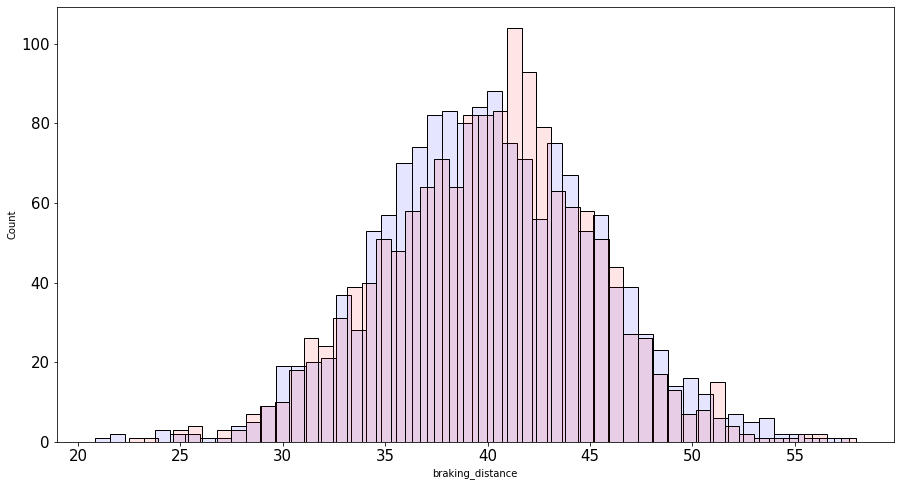

In [147]:
sns.histplot(gen_1["braking_distance"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["braking_distance"], color='red', bins=50, alpha=0.1);

In [148]:
wasserstein_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.0619686940147264, drifted=False, actual_threshold=0.1)

In [149]:
ks_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.19626576377865276, drifted=False, actual_threshold=0.05)

In [150]:
jensenshannon_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.06621168610254012, drifted=False, actual_threshold=0.1)

In [151]:
psi_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.035779956097353585, drifted=False, actual_threshold=0.1)